<a href="https://colab.research.google.com/github/vinicius-peres99/Formula-1/blob/main/Formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Leitura de dados com pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

f1 = pd.read_excel('/content/Dados/F1.xlsx')
 

print(f1)

                piloto                   equipe  ... posicao          tempo
0         Sérgio Perez         Red Bull Racing   ...       1    2:13:36.410
1    Sebastian Vettel      Aston Martin F1 Team  ...       2        +1.385s
2         Pierre Gasly      Scuderia AlphaTauri  ...       3        +2.762s
3     Charles Leclerc          Scuderia Ferrari  ...       4        +3.828s
4         Lando Norris          McLaren Racing   ...       5        +4.754s
5     Fernando Alonso           Alpine F1 Team   ...       6        +6.382s
6         Yuki Tsunoda      Scuderia AlphaTauri  ...       7        +6.624s
7         Carlos Sainz         Scuderia Ferrari  ...       8        +7.709s
8     Daniel Ricciardo          McLaren Racing   ...       9        +8.874s
9       Kimi Räikkönen        Alfa Romeo Racing  ...      10        +9.576s
10  Antonio Giovinazzi        Alfa Romeo Racing  ...      11       +10.254s
11     Valtteri Bottas  Mercedes AMG Motorsport  ...      12       +11.264s
12     Mick 

# 2 - Manipulação e limpeza de dados com pandas

In [ ]:
f1 = f1.drop(columns=['tempo','etapa','posicao'])

In [ ]:
print(f1)

                piloto                   equipe  pontuacao
0         Sérgio Perez         Red Bull Racing          25
1    Sebastian Vettel      Aston Martin F1 Team         18
2         Pierre Gasly      Scuderia AlphaTauri         15
3     Charles Leclerc          Scuderia Ferrari         12
4         Lando Norris          McLaren Racing          10
5     Fernando Alonso           Alpine F1 Team           8
6         Yuki Tsunoda      Scuderia AlphaTauri          6
7         Carlos Sainz         Scuderia Ferrari          4
8     Daniel Ricciardo          McLaren Racing           2
9       Kimi Räikkönen        Alfa Romeo Racing          1
10  Antonio Giovinazzi        Alfa Romeo Racing          0
11     Valtteri Bottas  Mercedes AMG Motorsport          0
12     Mick Schumacher             Haas F1 Team          0
13      Nikita Mazepin             Haas F1 Team          0
14      Lewis Hamilton  Mercedes AMG Motorsport          0
15     Nicholas Latifi          Williams Racing         

# 3 - Descritivo e exploração de dados com pandas (groupbys)

In [ ]:
f1 = f1[['equipe','pontuacao']]
f1equipe = f1.groupby('equipe').sum()

In [ ]:
f1EquipeOrdem = f1equipe.sort_values(by=['pontuacao'], ascending=False)
print(f1EquipeOrdem)

                         pontuacao  codigoEquipe
equipe                                          
Red Bull Racing                 91             7
Scuderia Ferrari                55             9
Mercedes AMG Motorsport         47             6
McLaren Racing                  39             5
Aston Martin F1 Team            32             3
Scuderia AlphaTauri             30             8
Alpine F1 Team                  12             2
Alfa Romeo Racing                2             1
Haas F1 Team                     0             4
Williams Racing                  0            10


In [ ]:
f1EquipeOrdem['codigoEquipe'] = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
print(f1EquipeOrdem)

                         pontuacao  codigoEquipe
equipe                                          
Red Bull Racing                 91             1
Scuderia Ferrari                55             2
Mercedes AMG Motorsport         47             3
McLaren Racing                  39             4
Aston Martin F1 Team            32             5
Scuderia AlphaTauri             30             6
Alpine F1 Team                  12             7
Alfa Romeo Racing                2             8
Haas F1 Team                     0             9
Williams Racing                  0            10


# 4 - Figuras que mostrem insights sobre os dados com pandas e matplotlib

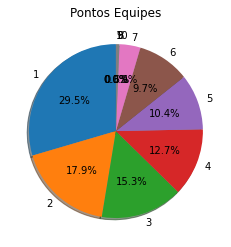

In [ ]:

pontuacao = f1EquipeOrdem['pontuacao']
equipe = f1EquipeOrdem["codigoEquipe"]

plt.pie(pontuacao, labels=equipe, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Pontos Equipes')

plt.show()


# 5 - Quebrar os dados em conjunto de treino e conjunto de teste:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X = f1EquipeOrdem.drop(columns='codigoEquipe')
y = f1EquipeOrdem['codigoEquipe']
print(X.shape, y.shape)

# Separando os dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=123)

(10, 1) (10,)



# 6-Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

resultado = []
for kernel in ['linear', 'poly', 'rbf']:
    clf = SVC(kernel=kernel)
    clf.fit(X_treino, y_treino)
    
    # Gerar previsoes no Train Set
    y_previsto = clf.predict(X_teste)
    acc = round(accuracy_score(y_teste, y_previsto) * 100, 2)
    resultado.append(acc)


# 7 - Verificar o desempenho do estimador do scikit-learn no conjunto de teste:

In [ ]:
print(f'Acurácia de teste - Kernel[linear]: {resultado[0]}%')
print(f'Acurácia de teste - Kernel[poly]: {resultado[1]}%')
print(f'Acurácia de teste - Kernel[rbf]: {resultado[2]}%')

Acurácia de teste - Kernel[linear]: 0.0%
Acurácia de teste - Kernel[poly]: 0.0%
Acurácia de teste - Kernel[rbf]: 0.0%
